# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [64]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

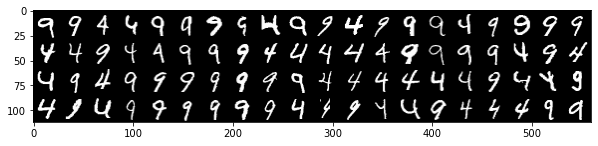

In [65]:
show_digit(X)

In [3]:
# Do feature normalization here
# begin answer
#print(np.nanmax(X))
#print(X.shape[0])
m=np.mean(X,axis=1).reshape(X.shape[0])
v=np.std(X,axis=1).reshape(X.shape[0])
np.place(v,v==0,1)
#np.place(v,v==0,1)
X=((X.T-m)/v).T

mt=np.mean(X_test,axis=1)#.reshape(X.shape[0])
vt=np.std(X_test,axis=1)#.reshape(X.shape[0])
np.place(vt,vt==0,1)
X_test=((X_test.T-m)/v).T
#print(X_test.shape[0])
#print(v)
#print(np.std(X,axis=1))
#print(m.shape[0])
#print(X)
# end answer
#print(X.shape[1])

### Ridge Regression and LOOCV

In [17]:
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge
#print(X.shape[0])
for i in range(len(lmbdas)):
#l=[2]
#for i in l:
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X,j,axis=1)  # take point j out of X
        y_ = np.delete(y,j,axis=1)
        if (i==5 and j==177):#in this point the program will report SVD can't merge,and I still can't figure out why
            continue
        w = ridge(X_, y_, lmbdas[i])
        
        testx=np.vstack((1,X[:,j].reshape((X.shape[0],1))))
        y2=np.sign(np.matmul(w.T,testx))
        y2=y2+y[0][j]
        if y2==0:
            E_val = E_val + 1
            
        
    if i==3:
        print('w without regularization:',np.matmul(w.T,w))
    
    # Update lmbda according validation error
    # begin answer
    #print(lmbda,end='')
    if E_val<E_val_min :
        E_val_min=E_val
        lmbda=lmbdas[i]
        w_g=w
    
    # end answer
    
# Compute training error
print('the chosen lmbda is:',lmbda)
y1=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
y1=np.vstack((y1,y))
y1=np.sum(y1,axis=0)
E_train=np.sum(y1==0)/y.shape[1]
print('train error',E_train)

# Do feature normalization to X_test, y_test
#have done in the front cell

# ...
#y3=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
# Compute test error
y3=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
y3=np.vstack((y3,y_test))
y3=np.sum(y3,axis=0)
E_test=np.sum(y3==0)/y_test.shape[1]
print('test error',E_test)


w without regulization: [[1.01936157]]
the chosen lmbda is: 100.0
train error 0.0
test error 0.06529382219989954


In [13]:
from ridge import ridge
w0=ridge(X, y, 0)
y0=np.sign(np.matmul(w0.T, np.vstack((np.ones((1, X.shape[1])), X))))
y0=np.vstack((y0,y))
y0=np.sum(y0,axis=0)
E_train=np.sum(y0==0)/y.shape[1]
print('without ragularization , train error:',E_train)
y3=np.sign(np.matmul(w0.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
y3=np.vstack((y3,y_test))
y3=np.sum(y3,axis=0)
E_test=np.sum(y3==0)/y_test.shape[1]
print('without ragularization , test error',E_test)

without ragularization , train error: 0.0
without ragularization , test error 0.13209442491210446


In [20]:
np.matmul(w_g.T,w_g)

array([[0.13293261]])

### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [55]:
from logistic_r import logistic_r

lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')
#print(X.shape[1],X.shape[0])
for i in range(len(lmbdas)):
#l=[len(lmbdas)-1]
#for i in l:
    E_val = 0
    #print(X[1][1])
    for j in range(X.shape[1]):
        X_ = np.delete(X,j,axis=1)  # take point j out of X
        y_ = np.delete(y,j,axis=1)
        w = logistic_r(X_, y_, lmbdas[i])
        
        testx=np.vstack((1,X[:,j].reshape((X.shape[0],1))))
        y2=np.sign(np.matmul(w.T,testx))
        y2=y2+y[0][j]
        if y2==0:
            E_val = E_val + 1
            

    # Update lmbda according validation error
    # begin answer
    if E_val<E_val_min :
        E_val_min=E_val
        lmbda=lmbdas[i]
        w_g=w
    # end answer
    #print(E_val)
    
print('the chosen lmbda is:',lmbda)
# Compute training error
y1=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
y1=np.vstack((y1,y))
y1=np.sum(y1,axis=0)
E_train=np.sum(y1==0)/y.shape[1]
print('train error with regularization',E_train)

# Compute test error
y3=np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
y3=np.vstack((y3,y_test))
y3=np.sum(y3,axis=0)
E_test=np.sum(y3==0)/y_test.shape[1]
print('test error with regularization',E_test)

the chosen lmbda is: 0.001
train error with regularization 0.0
test error with regularization 0.050226017076845805


In [50]:
from logistic_r import logistic_r
w0=logistic_r(X,y,0)
#print(w0)
y0=np.sign(np.matmul(w0.T, np.vstack((np.ones((1, X.shape[1])), X))))
y0=np.vstack((y0,y))
y0=np.sum(y0,axis=0)
E_train=np.sum(y0==0)/y.shape[1]
print('without ragularization , train error:',E_train)
y3=np.sign(np.matmul(w0.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
y3=np.vstack((y3,y_test))
y3=np.sum(y3,axis=0)
E_test=np.sum(y3==0)/y_test.shape[1]
print('without ragularization , test error',E_test)

without ragularization , train error: 0.0
without ragularization , test error 0.05173279758915118
